In [ ]:
# Install Biopython if not already installed
!pip install biopython


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 27.6 MB/s eta 0:00:00


In [ ]:
from Bio import Entrez, SeqIO

def fetch_fasta_from_ncbi(accession_id):
    Entrez.email = "xyz@gmail.com"  # Provide your email
    handle = Entrez.efetch(db="nucleotide", id=accession_id, rettype="fasta", retmode="text") # make sure to enter the db correctly. Use "protein" if you are using protein FASTA sequences. Or use "nucleotide" if you are using nucleotide sequences.
    record = SeqIO.read(handle, "fasta")
    handle.close()
    return str(record.seq), record.description

# Fetching two sequences by accession IDs
accession_id1 = "NM_001301717"  # Replace with your desired accession ID
accession_id2 = "NM_001301717"  # Replace with your desired accession ID

seq1, desc1 = fetch_fasta_from_ncbi(accession_id1)
seq2, desc2 = fetch_fasta_from_ncbi(accession_id2)
print(f"Fetched sequences:\n1. {desc1}\n2. {desc2}")


Fetched sequences:
1. NM_001301717.2 Homo sapiens C-C motif chemokine receptor 7 (CCR7), transcript variant 4, mRNA
2. NM_001301717.2 Homo sapiens C-C motif chemokine receptor 7 (CCR7), transcript variant 4, mRNA


In [ ]:
import numpy as np

def needleman_wunsch(seq1, seq2, match_score=1, mismatch_score=-1, gap_penalty=-1):
    n = len(seq1)
    m = len(seq2)

    score_matrix = np.zeros((n+1, m+1))

    for i in range(1, n+1):
        score_matrix[i][0] = i * gap_penalty
    for j in range(1, m+1):
        score_matrix[0][j] = j * gap_penalty

    for i in range(1, n+1):
        for j in range(1, m+1):
            match = score_matrix[i-1][j-1] + (match_score if seq1[i-1] == seq2[j-1] else mismatch_score)
            delete = score_matrix[i-1][j] + gap_penalty
            insert = score_matrix[i][j-1] + gap_penalty
            score_matrix[i][j] = max(match, delete, insert)

    align1, align2 = '', ''
    i, j = n, m
    while i > 0 or j > 0:
        if i > 0 and j > 0 and score_matrix[i][j] == score_matrix[i-1][j-1] + (match_score if seq1[i-1] == seq2[j-1] else mismatch_score):
            align1 = seq1[i-1] + align1
            align2 = seq2[j-1] + align2
            i -= 1
            j -= 1
        elif i > 0 and score_matrix[i][j] == score_matrix[i-1][j] + gap_penalty:
            align1 = seq1[i-1] + align1
            align2 = '-' + align2
            i -= 1
        else:
            align1 = '-' + align1
            align2 = seq2[j-1] + align2
            j -= 1

    return align1, align2, score_matrix[n][m]


In [ ]:
def save_alignment(alignment1, alignment2, score, output_file):
    with open(output_file, 'w') as f:
        f.write(f"Alignment 1:\n{alignment1}\n")
        f.write(f"Alignment 2:\n{alignment2}\n")
        f.write(f"Alignment Score: {score}\n")

output_file = "alignment_result.txt"
alignment1, alignment2, score = needleman_wunsch(seq1, seq2)
save_alignment(alignment1, alignment2, score, output_file)
print(f"Alignment saved to {output_file}")


Alignment saved to alignment_result.txt


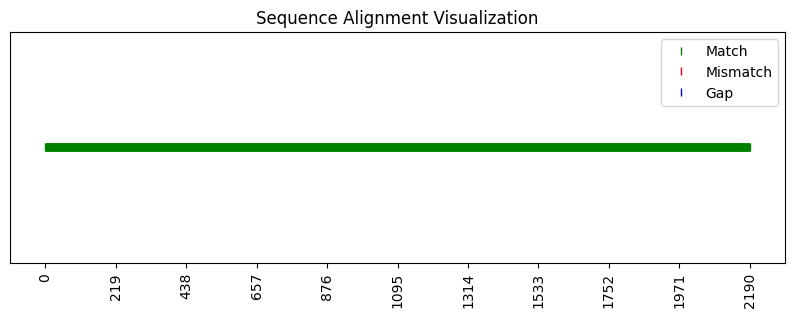

Plot saved as alignment_plot.pdf


In [ ]:
import matplotlib.pyplot as plt

def plot_alignment_and_save(alignment1, alignment2, output_pdf):
    match_color = 'green'
    mismatch_color = 'red'
    gap_color = 'blue'

    matches = []
    mismatches = []
    gaps = []

    for i in range(len(alignment1)):
        if alignment1[i] == alignment2[i]:
            matches.append(i)
        elif alignment1[i] == '-' or alignment2[i] == '-':
            gaps.append(i)
        else:
            mismatches.append(i)

    plt.figure(figsize=(10, 3))
    plt.plot(matches, [1] * len(matches), '|', color=match_color, label='Match')
    plt.plot(mismatches, [1] * len(mismatches), '|', color=mismatch_color, label='Mismatch')
    plt.plot(gaps, [1] * len(gaps), '|', color=gap_color, label='Gap')

    plt.yticks([])
    plt.xticks(range(0, len(alignment1), max(1, len(alignment1)//10)), rotation=90)
    plt.title('Sequence Alignment Visualization')
    plt.legend(loc='upper right')

    # Save the plot as a PDF file
    plt.savefig(output_pdf, format='pdf')
    plt.show()

# Save the plot as 'alignment_plot.pdf'
output_pdf = "alignment_plot.pdf"
plot_alignment_and_save(alignment1, alignment2, output_pdf)
print(f"Plot saved as {output_pdf}")


In [ ]:
import zipfile
import os

def zip_project(zip_filename, files_to_zip):
    with zipfile.ZipFile(zip_filename, 'w') as zipf:
        for file in files_to_zip:
            zipf.write(file)
            os.remove(file)  # Optional: Remove the file after zipping it

zip_filename = "dna_alignment_project.zip"
files_to_zip = [output_file]
zip_project(zip_filename, files_to_zip)
print(f"Project files zipped into {zip_filename}")


Project files zipped into dna_alignment_project.zip
